# nosequetitulo ponerle :3
Integrante:
* Héctor López

Docente:
* Renzo

## 1. Objetivo del análisis

La industria de los videojuegos no es solo entretenimiento: es un motor cultural que refleja innovación, creatividad y comunidad.
Las “tendencias de gaming” abarcan la evolución de plataformas, géneros, comportamiento de jugadores y economía del sector. Hoy el ecosistema compite entre consolas, PC y mobile; las consolas apuestan por exclusivas, el PC lidera en competitivo/modding y el móvil democratiza el acceso.

El cloud gaming difumina fronteras. Géneros clásicos (Acción, Aventura, RPG) conviven con nichos en auge (Simulación, Supervivencia, indies) y subgéneros (souls-like, roguelike). Las calificaciones y reseñas de usuarios son “moneda” que guía a los desarrolladores hacia modelos live-service y actualizaciones iterativas. Las regiones imprimen estilos distintos (Asia móvil/esports; Norteamérica AAA; Europa indies), y coexisten el músculo de los AAA con la creatividad coste-eficiente de los indies, mientras microtransacciones y pases de temporada sostienen ingresos.
Tecnologías inmersivas (VR/AR/háptica) y el potencial del “metaverso” asoman, y el streaming/esports convierten al juego en espectáculo global. Estas tendencias importan porque moldean comunidades, impulsan innovación y posicionan al gaming a la vanguardia del entretenimiento digital. 


El objetivo principal de este análisis es explorar y comprender las tendencias en la industria de los videojuegos mediante estadísticas descriptivas. Esto incluye identificar patrones de ganancias diarias, mensuales y anuales; comportamiento y  distribución de datos relaciones temporales.

## 2. Fuente de información
El dataset utilizado proviene de una fuente confiable relacionada con la industria de los videojuegos. Contiene información sobre ventas, puntuaciones, fechas de lanzamiento y otros atributos relevantes.

**Referencia:** https://www.kaggle.com/datasets/anonymous28574/gaming-trends-2024 License Apache 2.0

# Objetivos

General:
Identificar los factores clave que determinan el éxito financiero de videojuegos mediante análisis predictivo para apoyar decisiones de negocio en la industria gaming.




Específicos:  



Predecir los ingresos generados por un videojuego en función de métricas de uso y engagement (Regresión Lineal Múltiple).

Clasificar la efectividad de promociones con influencers según actividad en redes sociales y plataformas de streaming (Random Forest).

Segmentar videojuegos en grupos homogéneos según patrones de comportamiento de usuarios (K-Means).


Hipótesis de Regresión: Existe una relación lineal positiva entre la duración promedio de sesión, las compras en el juego y los ingresos totales (p<0.05).

Hipótesis de Clasificación: Los juegos con menciones en redes sociales por encima del percentil 75 tienen mayor probabilidad de éxito en promociones con influencers (F1>0.85).

Hipótesis de Clustering: Los videojuegos se agrupan naturalmente en 3 clusters diferenciados por intensidad de uso (DAU) y monetización (Ingresos/Usuario).


# Datos en el Dataset

**Date**:   fecha de lanzamiento del juego.

**Platform**:   plataforma (PC, Consola, Móvil, VR).

**Daily Active Users (DAU)**:   usuarios activos diarios.

**New Registrations**:  nuevos registros.

**Session Duration (min)**:     duración promedio por sesión.

**In-game Purchases ($)**:  ingresos por transacciones dentro del juego.

**Social Media Mentions**:  menciones en redes sociales.

**Stream Viewership**:  audiencia en plataformas de streaming en vivo.

**Revenue ($)**:    ingresos totales (ventas, in-game, suscripciones).

**Top Genre**:  género principal (Acción, RPG, Estrategia, Simulación, etc.).

**Influencer Endorsements**:     0/1 si hubo promoción por influencers.

In [19]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Estilo de gráficos
plt.style.use('seaborn-v0_8')

In [20]:
# Cargar el dataset
df = pd.read_csv('data/Gaming-Trends-2024.csv')
df.head()

,Date,Platform,Daily Active Users (DAU),New Registrations,Session Duration (minutes),In-game Purchases ($),Social Media Mentions,Stream Viewership,Revenue ($),Top Genre,Influencer Endorsements
0,2022-04-13,PC,142204,14220,31.266635,60772.724060,7116,85079.542766,87378.407590,Action,0
1,2021-03-17,PC,132314,13231,23.314436,43499.834450,6582,64188.420576,41132.113751,Action,0
2,2019-03-09,VR,111557,11155,33.859334,52178.791314,5572,34385.665788,71787.342041,Simulation,0
3,2021-03-31,Console,132909,13290,80.580010,25085.562444,6619,43129.915707,18639.641156,RPG,0
4,2021-02-04,Mobile,130694,13069,37.270903,55277.074439,6555,69341.389827,63849.959750,Action,0


In [17]:
# Seleccionar columna numérica para análisis 
col = 'Revenue ($)'  # columna objetivo

media = df[col].mean()
media_ponderada = np.average(df[col], weights=df[col]) # ejemplo de pesos iguales
moda = df[col].mode()[0]
mediana = df[col].median()
rango = df[col].max() - df[col].min()
varianza = df[col].var()
desviacion = df[col].std()
coef_var = desviacion / media
iqr = stats.iqr(df[col])
minimo = df[col].min()
maximo = df[col].max()
suma = df[col].sum()
conteo = df[col].count()

# muestra los resultados
print(f'Media: {media}')
print(f'Media ponderada: {media_ponderada}')
print(f'Moda: {moda}')
print(f'Mediana: {mediana}')
print(f'Rango: {rango}')
print("------------------------------")
print(f'Varianza: {varianza}')
print(f'Desviación estándar: {desviacion}')
print(f'Coeficiente de variación: {coef_var}')
print(f'Rango intercuartílico: {iqr}')
print(f'Mínimo: {minimo}')
print(f'Máximo: {maximo}')
print(f'Suma: {suma}')
print(f'Conteo: {conteo}')
print("_______________________________________________")
#redondeado
print(f'Media redondeada: {round(media,2)}')
print(f'Media ponderada redondeada: {round(media_ponderada,2)}')
print(f'Moda redondeada: {round(moda,2)}')
print(f'Mediana redondeada: {round(mediana,2)}')
print(f'Rango redondeado: {round(rango,2)}')
print("------------------------------")
print(f'Varianza redondeada: {round(varianza,2)}')
print(f'Desviación estándar redondeada: {round(desviacion,2)}')
print(f'Coeficiente de variación redondeado: {round(coef_var,2)}')
print(f'Rango intercuartílico redondeado: {round(iqr,2)}')
print(f'Mínimo redondeado: {round(minimo,2)}')
print(f'Máximo redondeado: {round(maximo,2)}')
print(f'Suma redondeada: {round(suma,2)}')
print(f'Conteo redondeado: {round(conteo,2)}')

Media: 70411.81717104636
Media ponderada: 95454.86622208334
Moda: 5010.198644202215
Mediana: 64279.95970491504
Rango: 144983.6993638596
------------------------------
Varianza: 1763680104.9384015
Desviación estándar: 41996.19155278728
Coeficiente de variación: 0.5964366954309522
Rango intercuartílico: 73428.18854594571
Mínimo: 5010.198644202215
Máximo: 149993.8980080618
Suma: 351284555.8663503
Conteo: 4989
_______________________________________________
Media redondeada: 70411.82
Media ponderada redondeada: 95454.87
Moda redondeada: 5010.2
Mediana redondeada: 64279.96
Rango redondeado: 144983.7
------------------------------
Varianza redondeada: 1763680104.94
Desviación estándar redondeada: 41996.19
Coeficiente de variación redondeado: 0.6
Rango intercuartílico redondeado: 73428.19
Mínimo redondeado: 5010.2
Máximo redondeado: 149993.9
Suma redondeada: 351284555.87
Conteo redondeado: 4989


# Limpieza

In [35]:
df_cleaned = df.drop_duplicates()

df_cleaned = df_cleaned.dropna()

df_cleaned.shape, df_cleaned.isna().sum().sum(), df_cleaned.duplicated().sum()

((4989, 11), np.int64(0), np.int64(0))

In [36]:
# Asegurar que la columna existe y no tiene valores nulos
df['Top Genre'] = df['Top Genre'].fillna('Desconocido')

# Extraer géneros únicos
generos_unicos = df['Top Genre'].unique()

# Mostrar ordenados
print(" Géneros únicos encontrados:")
for genero in sorted(generos_unicos):
    print("-", genero)


 Géneros únicos encontrados:
- Action
- Adventure
- FPS
- RPG
- Simulation


In [37]:
csv_path = "data/Gaming-Trends-2024.csv"
df = pd.read_csv(csv_path)
print("Shape:", df.shape)
print("Columnas:", list(df.columns))
df.head()

genre_mapping = {
    'Action': '00',
    'Simulation': '01',
    'RPG': '02',
    'FPS': '03',
    'Adventure': '04'
}

df['Top Genre'] = df['Top Genre'].replace(genre_mapping)

df.head()

Shape: (4989, 11)
Columnas: ['Date', 'Platform', 'Daily Active Users (DAU)', 'New Registrations', 'Session Duration (minutes)', 'In-game Purchases ($)', 'Social Media Mentions', 'Stream Viewership', 'Revenue ($)', 'Top Genre', 'Influencer Endorsements']


,Date,Platform,Daily Active Users (DAU),New Registrations,Session Duration (minutes),In-game Purchases ($),Social Media Mentions,Stream Viewership,Revenue ($),Top Genre,Influencer Endorsements
0,2022-04-13,PC,142204,14220,31.266635,60772.724060,7116,85079.542766,87378.407590,00,0
1,2021-03-17,PC,132314,13231,23.314436,43499.834450,6582,64188.420576,41132.113751,00,0
2,2019-03-09,VR,111557,11155,33.859334,52178.791314,5572,34385.665788,71787.342041,01,0
3,2021-03-31,Console,132909,13290,80.580010,25085.562444,6619,43129.915707,18639.641156,02,0
4,2021-02-04,Mobile,130694,13069,37.270903,55277.074439,6555,69341.389827,63849.959750,00,0


In [38]:
#Date a tipo datetime
#Extraer componentes: año, mes, día, día de la semana, trimestre.

df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Weekday"] = df["Date"].dt.day_name()


In [41]:
#Normalización y escalado

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[[ "Revenue ($)", "In-game Purchases ($)"]] = scaler.fit_transform(df[[ "Revenue ($)", "In-game Purchases ($)"]])


In [42]:
# Crear variable binaria 'High_Sales' usando el percentil 75 de ingresos
threshold = df['Revenue ($)'].quantile(0.75)
df['High_Sales'] = (df['Revenue ($)'] >= threshold).astype(int)

# Verifica distribución
print("Distribución de High_Sales:")
print(df['High_Sales'].value_counts())


Distribución de High_Sales:
High_Sales
0    3741
1    1248
Name: count, dtype: int64


# Graficos

In [32]:


# Selecciona variables predictoras (features) y la variable objetivo (target)

X = df[[ 
    'Session Duration (minutes)', 'In-game Purchases ($)'
    # agrega aquí las columnas que quieras usar como predictores
]]
y = df[
     'Revenue ($)'  # columna objetivo
]

# Partición de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predicciones
y_pred = reg.predict(X_test)

# Métricas
print("MAE:", mean_absolute_error(y_test, y_pred))
#print("RMSE:", mean_squared_error(y_test, y_pred, squared=False)) #version no compatible con mi contenedor u.u
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print("R²:", r2_score(y_test, y_pred))


MAE: 36499.95346492027
RMSE: 41614.317015695386
R²: 0.026139411325421302


MAE ≈ 36.500: en promedio, el modelo se equivoca unos 36 mil dólares respecto al ingreso real.

RMSE ≈ 41.600: los errores grandes pesan más, y aquí se nota que hay desviaciones fuertes.

R² ≈ 0.026: el modelo apenas explica un 2,6% de la variabilidad de los ingresos. no sirve de nada!

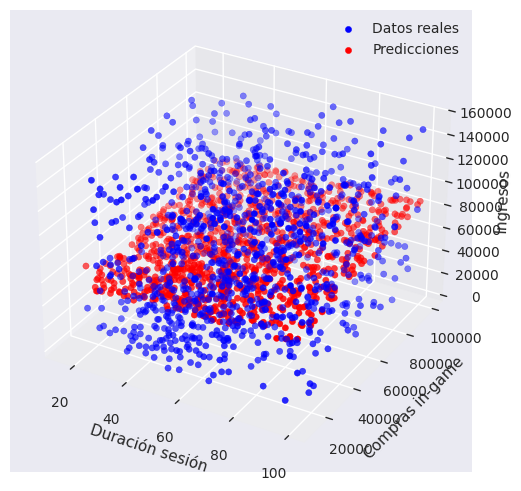

In [28]:
#visualizacion de resultados
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['Session Duration (minutes)'],
           X_test['In-game Purchases ($)'],
           y_test, c='blue', label='Datos reales')

ax.scatter(X_test['Session Duration (minutes)'],
           X_test['In-game Purchases ($)'],
           y_pred, c='red', label='Predicciones')

ax.set_xlabel("Duración sesión")
ax.set_ylabel("Compras in-game")
ax.set_zlabel("Ingresos")
ax.legend()
plt.show()


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# Variable objetivo binaria: por ejemplo, éxito de ventas (1 = alto, 0 = bajo)
y = df[
    'High_Sales'  # crea esta columna según tu criterio (ej: Revenue > percentil 75)
]
X = df[[ 
     'Social Media Mentions', 'Stream Viewership', 'Influencer Endorsements'
    # agrega aquí las columnas predictoras
]]

# Partición
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.6933867735470942
F1: 0.23115577889447236
ROC-AUC: 0.5591229946524063
Matriz de confusión:
 [[646 102]
 [204  46]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       748
           1       0.31      0.18      0.23       250

    accuracy                           0.69       998
   macro avg       0.54      0.52      0.52       998
weighted avg       0.65      0.69      0.66       998



Hipótesis original: “Los juegos con menciones en redes sociales por encima del percentil 75 tienen mayor probabilidad de éxito en promociones con influencers.”

Lo que muestran los resultados:

El modelo no logra capturar bien ese patrón.

La probabilidad de clasificar correctamente un juego exitoso es baja.

Esto sugiere que las variables usadas (menciones, stream viewership, endorsements) no bastan solas para explicar el éxito post‑pandemia.